In [1]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

In [2]:
def plot_decision_boundary(X, model):
    h = .02 

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [3]:
def plot_decision_boundary_for_two_datasets(model_dataset_1, model_dataset_2):
    fig = plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.scatter(X1[:,0], X1[:,1], s=100, c=Y1, alpha=0.5)
    plot_decision_boundary(X1, model_dataset_1)
    plt.title('Dataset 1')
    plt.subplot(1, 2, 2)
    plt.scatter(X2[:,0], X2[:,1], s=100, c=Y2, alpha=0.5)
    plot_decision_boundary(X2, model_dataset_2)
    plt.title('Dataset 2')

# Create Dataset

In [4]:
def create_dataset_1():
    np.random.seed(10)

    N = 500
    D = 2
    X = np.random.randn(N, D)

    delta = 1.75
    X[:125] += np.array([delta, delta])
    X[125:250] += np.array([delta, -delta])
    X[250:375] += np.array([-delta, delta])
    X[375:] += np.array([-delta, -delta])
    Y = np.array([0] * 125 + [1]*125 + [1]*125 + [0] * 125)
    
    return X, Y

In [5]:
def create_dataset_2():
    np.random.seed(10)

    N = 500
    D = 2
    X = np.random.randn(N, D)

    R_smaller = 5
    R_larger = 10

    R1 = np.random.randn(N//2) + R_smaller
    theta = 2 * np.pi * np.random.random(N//2)
    X[:250] = np.concatenate([[R1 * np.cos(theta)], [R1*np.sin(theta)]]).T


    R2 = np.random.randn(N//2) + R_larger
    theta = 2 * np.pi * np.random.random(N//2)
    X[250:] = np.concatenate([[R2 * np.cos(theta)], [R2*np.sin(theta)]]).T

    Y = np.array([0] * (N//2) + [1] * (N//2))
    
    return X, Y

In [6]:
X1, Y1 = create_dataset_1()
X2, Y2 = create_dataset_2()

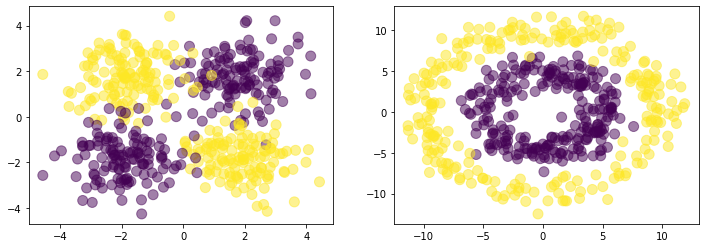

In [7]:
fig = plt.figure(figsize=(12,4))
ax1=plt.subplot(1, 2, 1)
plt.scatter(X1[:,0], X1[:,1], s=100, c=Y1, alpha=0.5)
ax2=plt.subplot(1, 2, 2)
plt.scatter(X2[:,0], X2[:,1], s=100, c=Y2, alpha=0.5)

# Decision Tree

In [8]:
dt_ds1 = DecisionTreeClassifier()
dt_ds1.fit(X1, Y1)
print("Score for Dataset 1:", dt_ds1.score(X1, Y1))
dt_ds2 = DecisionTreeClassifier()
dt_ds2.fit(X2, Y2)
print("Score for Dataset 2", dt_ds2.score(X2, Y2))

Score for Dataset 1: 1.0
Score for Dataset 2 1.0


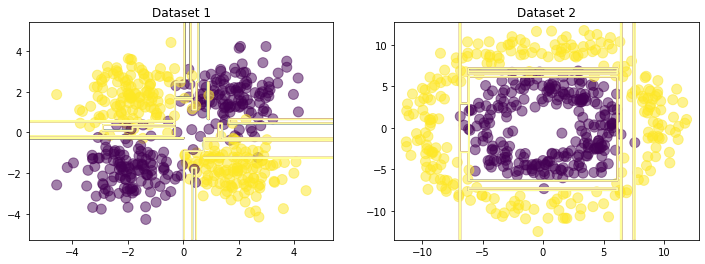

In [9]:
plot_decision_boundary_for_two_datasets(dt_ds1, dt_ds2)

# Decision Tree 3 Max Depth

In [10]:
dt3_ds1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt3_ds1.fit(X1, Y1)
print("Score for Dataset 1:", dt3_ds1.score(X1, Y1))
dt3_ds2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt3_ds2.fit(X2, Y2)
print("Score for Dataset 2", dt3_ds2.score(X2, Y2))

Score for Dataset 1: 0.922
Score for Dataset 2 0.896


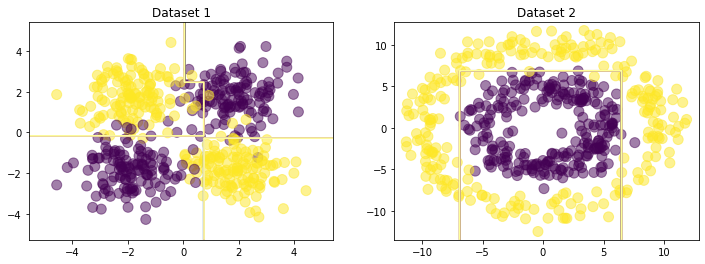

In [11]:
plot_decision_boundary_for_two_datasets(dt3_ds1, dt3_ds2)

# Decision Tree 5 Max Depth

In [12]:
dt5_ds1 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt5_ds1.fit(X1, Y1)
print("Score for Dataset 1:", dt5_ds1.score(X1, Y1))
dt5_ds2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt5_ds2.fit(X2, Y2)
print("Score for Dataset 2", dt5_ds2.score(X2, Y2))

Score for Dataset 1: 0.97
Score for Dataset 2 0.986


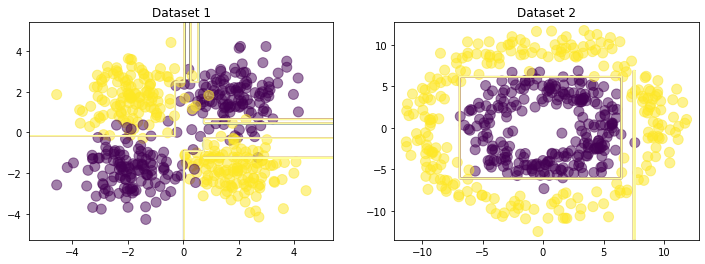

In [13]:
plot_decision_boundary_for_two_datasets(dt5_ds1, dt5_ds2)

# Logistic Regression

In [14]:
logreg_ds1 = LogisticRegression()
logreg_ds1.fit(X1, Y1)
print("Score for Dataset 1:", logreg_ds1.score(X1, Y1))
logreg_ds2 = LogisticRegression()
logreg_ds2.fit(X2, Y2)
print("Score for Dataset 2", logreg_ds2.score(X2, Y2))

Score for Dataset 1: 0.504
Score for Dataset 2 0.564


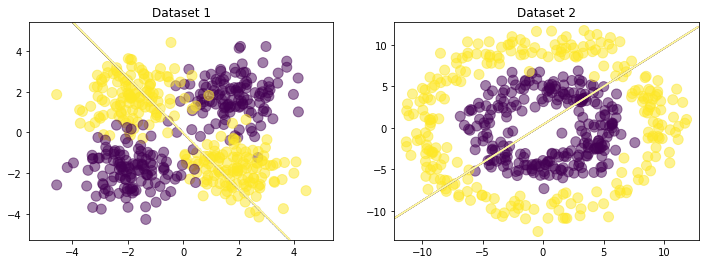

In [15]:
plot_decision_boundary_for_two_datasets(logreg_ds1, logreg_ds2)

# Bagged Decision Tree

In [16]:
class BaggedTreeClassifier:
    def __init__(self, M):
        self.M = M
        
    def fit(self, X, Y):
        N = len(X)
        self.models = []
        for m in range(self.M):
            idx = np.random.choice(N, size=N, replace=True)
            Xb, Yb = X[idx], Y[idx]
            model = DecisionTreeClassifier(max_depth=5)
            model.fit(Xb, Yb)
            self.models.append(model)
    
    def predict(self,X):
        predictions = np.zeros(len(X))
        for model in self.models:
            predictions += model.predict(X)
        return np.round(predictions / self.M)
    
    def score(self,X,Y):
        result = self.predict(X)
        return np.mean(result == Y)

In [17]:
btree_ds1 = BaggedTreeClassifier(M=200)
btree_ds1.fit(X1, Y1)
print("Score for Dataset 1:", btree_ds1.score(X1, Y1))
btree_ds2 = BaggedTreeClassifier(M=200)
btree_ds2.fit(X2, Y2)
print("Score for Dataset 2", btree_ds2.score(X2, Y2))

Score for Dataset 1: 0.964
Score for Dataset 2 0.992


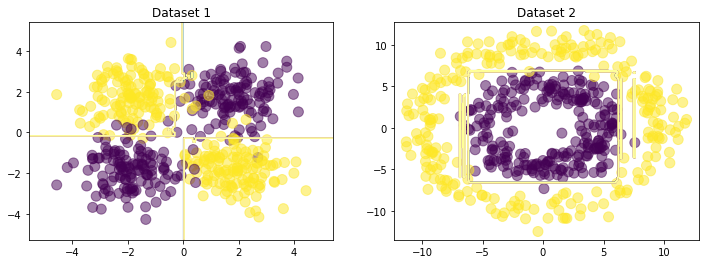

In [18]:
plot_decision_boundary_for_two_datasets(btree_ds1, btree_ds2)